In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerco/price_data.csv
/kaggle/input/powerco/Data Description.docx
/kaggle/input/powerco/client_data.csv


Required & Available data- Customer data, churn data and historical price data

Work plan-
* define what price sensitivity is and calculate it- EDA
* feature engineering
* build a binary classification model
* analyse how price changes impact churn

**EDA**

In [2]:
# import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
client_df= pd.read_csv("/kaggle/input/powerco/client_data.csv")
price_df= pd.read_csv("/kaggle/input/powerco/price_data.csv")

In [4]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


From above it is seen that columns- cons_12m, cons_gas_12m, cons_last_month, forecast_cons_12m, forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m, forecast_price_energy_off_peak,forecast_price_energy_peak, forecast_price_pow_off_peak, are skewed.

In [7]:
client_df.describe(include=object)

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


In [8]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [11]:
price_df.describe(include=object)

,id,price_date
count,193002,193002
unique,16096,12
top,038af19179925da21a25619c5a24b745,2015-08-01
freq,12,16094


In [12]:
#converting datetime related columns to right datatype
from datetime import datetime
client_df["date_activ"]=pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"]=pd.to_datetime(client_df["date_end"], format="%Y-%m-%d")
client_df["date_modif_prod"]=pd.to_datetime(client_df["date_modif_prod"], format="%Y-%m-%d")
client_df["date_renewal"]=pd.to_datetime(client_df["date_renewal"], format="%Y-%m-%d")
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

**DATA VISUALIZATION**

This workbook is inline with the BCG Gamma tasks given

The following distributions shall be studied
* Churn
* Sales Channel
* Consumption
* Forecast
* Contract Type
* Margins
* Subscribed Power
* Other columns

In [13]:
def plot_stacked_bars(dataframe,title_,size_=(18,10),rot_=0,legend_="upper right"):
    ax= dataframe.plot(kind='bar',stacked="True",figsize=size_, rot=rot_, title=title_)
    annotate_stacked_bars(ax, textsize=14)
    plt.legend(["Retention","Churn"],loc=legend_)
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, color="white",textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value =='0.0':
            continue
        ax.annotate(value, ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
color=color, size= textsize)

**Customers Churned**

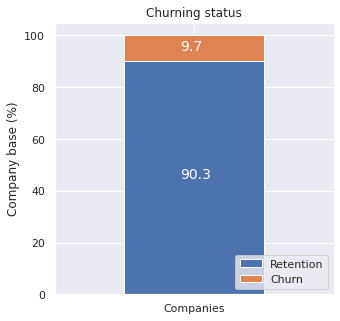

In [14]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5),legend_="lower right")

Approx 10% of the customers have churned

** Customers churned under different Sales Channel**

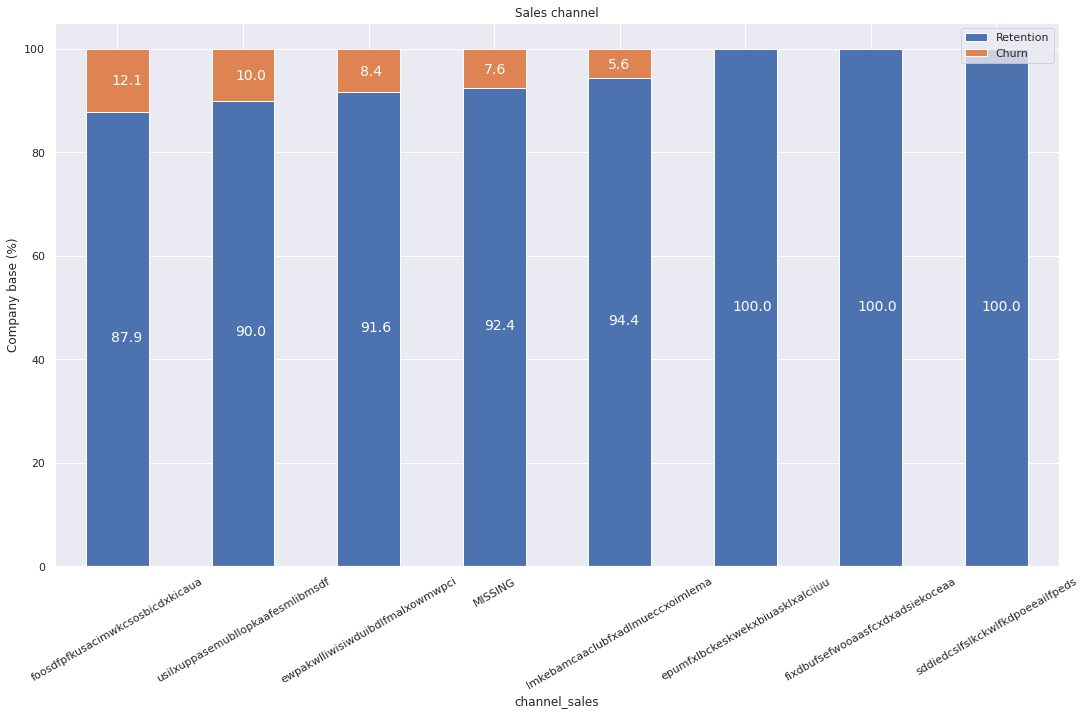

In [15]:
channel= client_df[["id","channel_sales","churn"]]
channel= channel.groupby([channel["channel_sales"],channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel_churn= (channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1], ascending=False)

plot_stacked_bars(channel_churn,'Sales channel', rot_=30)

Churning is distributed across 5 different sales channel but one of them is the missing value category

**Consumption in the last year and month**

In [16]:
consumption=client_df[["id","cons_12m","cons_gas_12m","cons_last_month","imp_cons","has_gas","churn"]]

In [17]:
def plot_dis(dataframe,column,ax,bins_=50):
    temp=pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                      "Churn":dataframe[dataframe["churn"]==1][column]}) # a temporary df
    temp[["Retention","Churn"]].plot(kind='hist',bins=bins_,ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

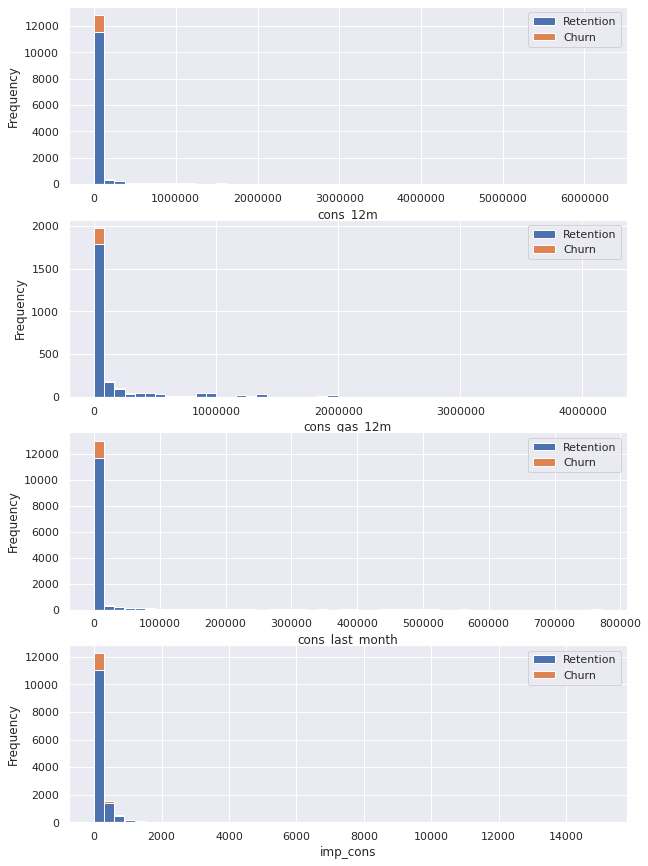

In [18]:
fig,axs=plt.subplots(nrows=4,figsize=(10,15))
plot_dis(consumption,'cons_12m',axs[0])
plot_dis(consumption[consumption['has_gas']=='t'],'cons_gas_12m',axs[1])
plot_dis(consumption,'cons_last_month',axs[2])
plot_dis(consumption, "imp_cons",axs[3])

The consumption data is right skewed. Box plot can be plotted to see for outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='imp_cons'>

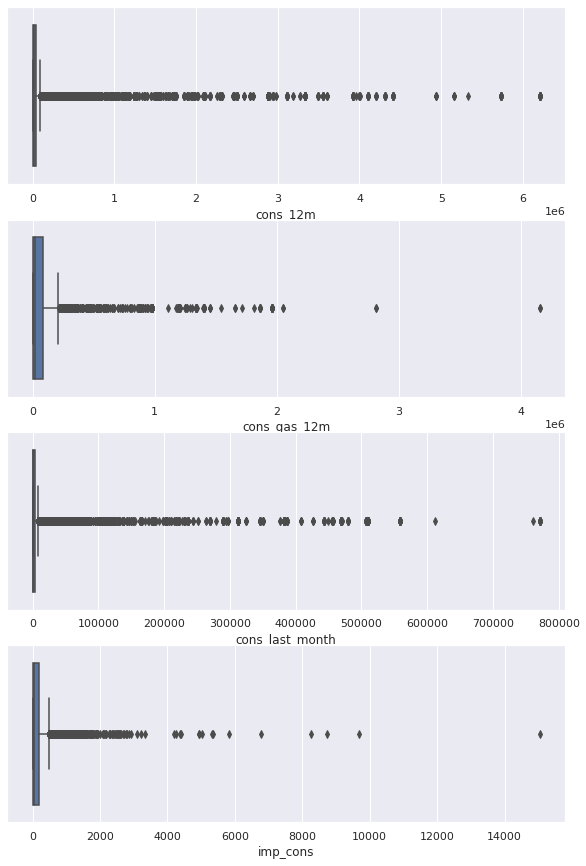

In [19]:
fig, axs= plt.subplots(nrows=4, figsize=(10,15))
sns.boxplot(consumption["cons_12m"],ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"],ax=axs[2])
sns.boxplot(consumption["imp_cons"],ax=axs[3])

**Forecast**

In [20]:
forecast= client_df[["id","forecast_cons_12m","forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
                    "forecast_price_energy_off_peak","forecast_price_energy_peak","forecast_price_pow_off_peak","churn"]]

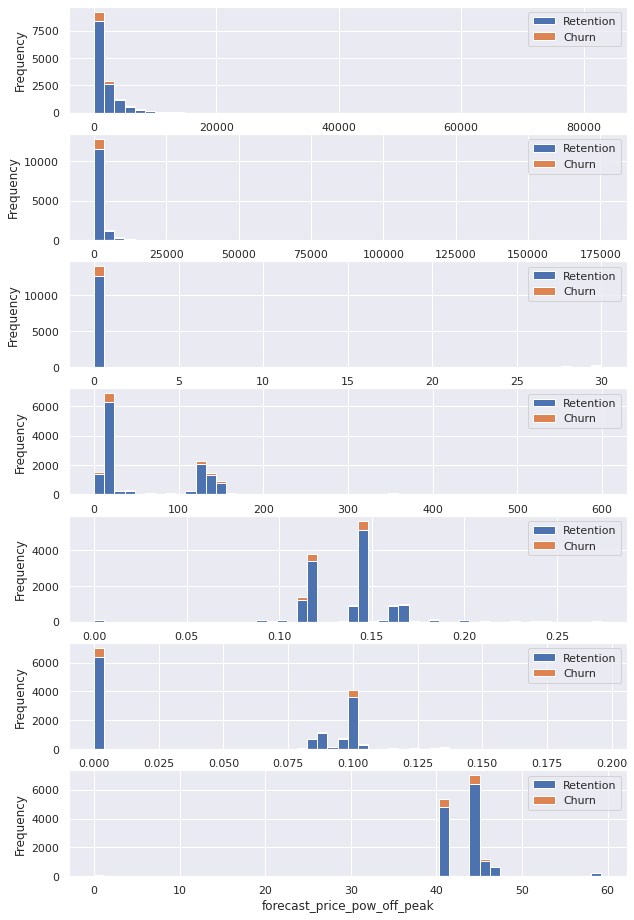

In [21]:
fig,axs=plt.subplots(nrows=7,figsize=(10,16))
plot_dis(client_df,"forecast_cons_12m",axs[0])
plot_dis(client_df, "forecast_cons_year", axs[1])
plot_dis(client_df,"forecast_discount_energy", axs[2])
plot_dis(client_df,"forecast_meter_rent_12m", axs[3])
plot_dis(client_df,"forecast_price_energy_off_peak", axs[4])
plot_dis(client_df,"forecast_price_energy_peak",axs[5])
plot_dis(client_df,"forecast_price_pow_off_peak", axs[6])

**Contract Type**

In [22]:
contract_type=client_df[["id","has_gas","churn"]]
contract= contract_type.groupby([contract_type["churn"],contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage=(contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

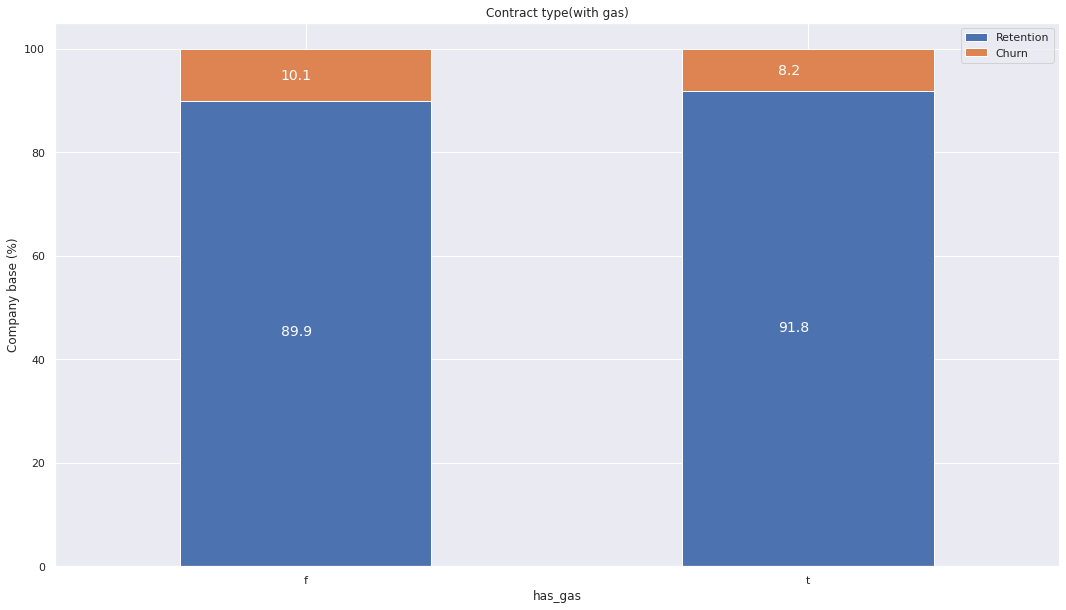

In [23]:
plot_stacked_bars(contract_percentage,"Contract type(with gas)")

**Margins**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='net_margin'>

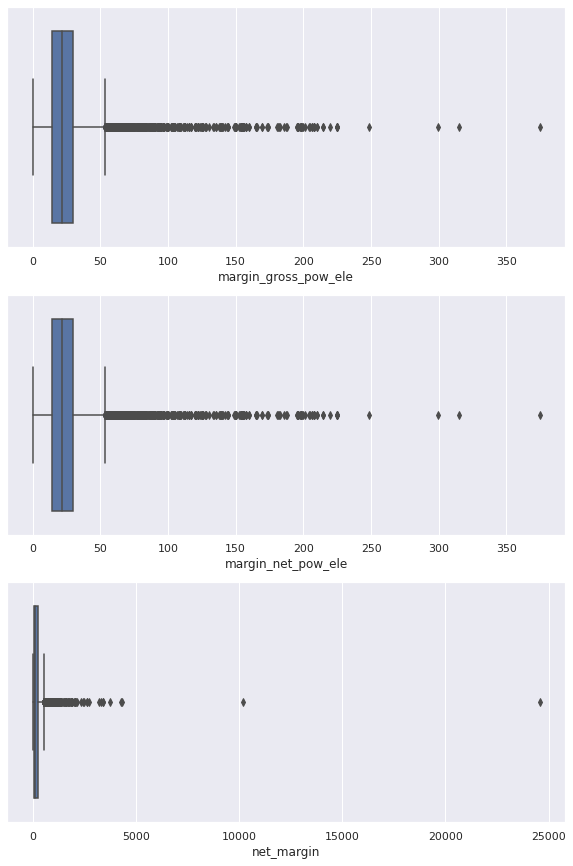

In [24]:
margin= client_df[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]
fig,axs=plt.subplots(nrows=3,figsize=(10,15))
sns.boxplot(margin["margin_gross_pow_ele"],ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"],ax=axs[2])

**Subscribed Power**

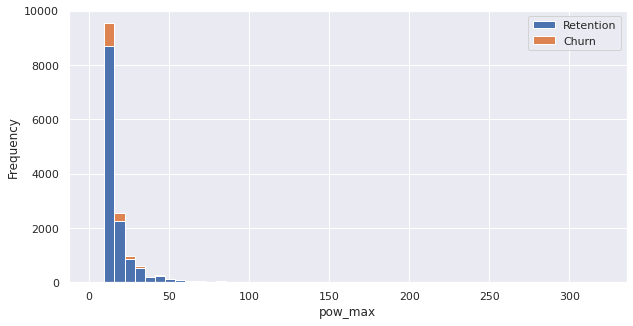

In [25]:
power=client_df[["id","pow_max","churn"]]
fig,axs=plt.subplots(nrows=1,figsize=(10,5))
plot_dis(power,"pow_max",axs)

**Other Columns**- Number of Products, Number of years, Origin of the contract

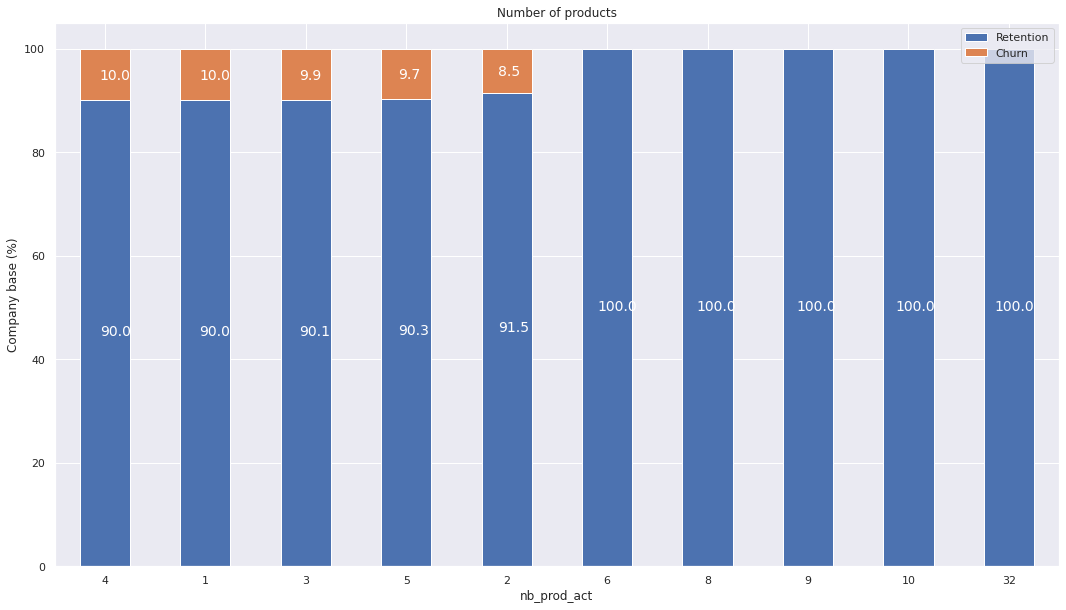

In [26]:
others= client_df[["id","nb_prod_act","num_years_antig","origin_up","churn"]]
products=others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percent= (products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plot_stacked_bars(products_percent, "Number of products")

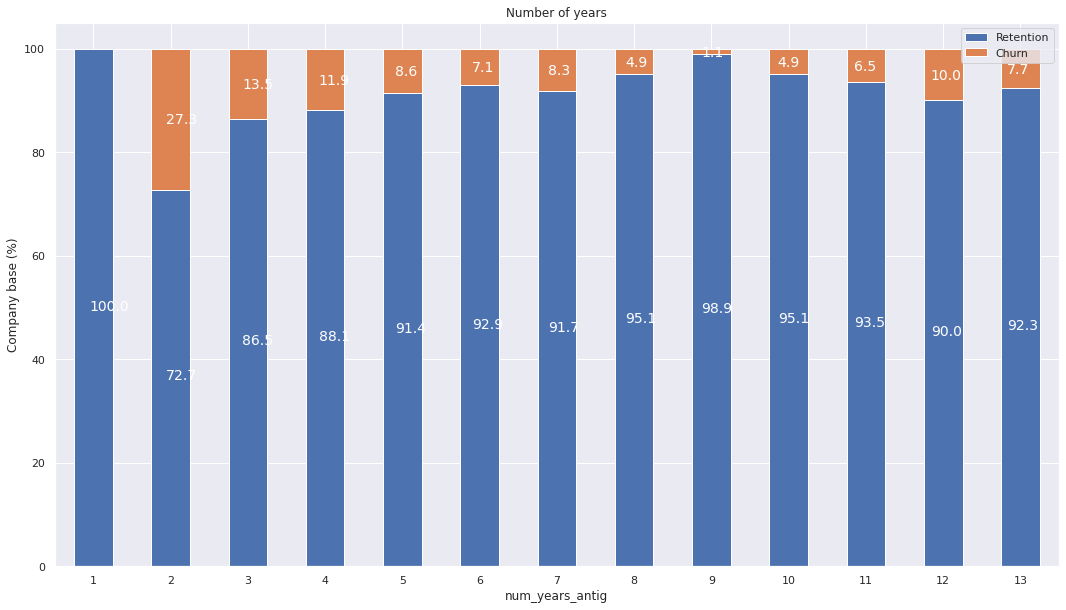

In [27]:
years_antig=others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percent=(years_antig.div(years_antig.sum(axis=1),axis=0)*100)
plot_stacked_bars(years_antig_percent, "Number of years")

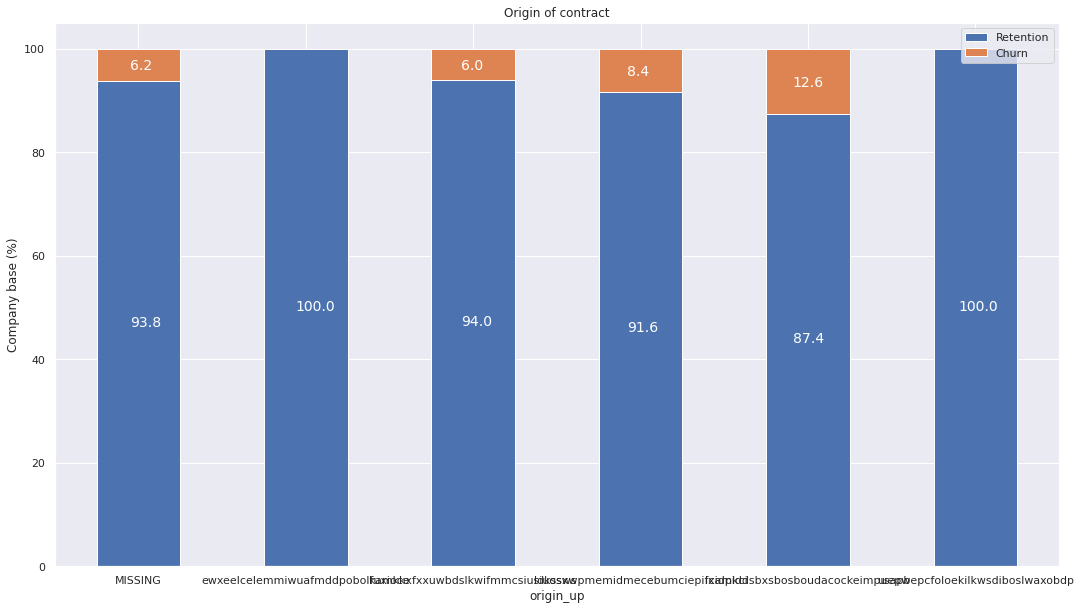

In [28]:
origin= others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percent=(origin.div(origin.sum(axis=1),axis=0)*100)
plot_stacked_bars(origin_percent,"Origin of contract")

**Hypothesis Investigation**

Creating price sensitivity features based on sensitivity features

In [29]:
var_year=price_df.groupby(["id","price_date"]).mean().groupby(["id"]).var().reset_index() #yearly sensitivity feature

In [30]:
#renaming the columns of yearly sensitivity
var_year = var_year.rename(columns={
    "price_off_peak_var":"var_year_price_off_peak_var",
    "price_peak_var":"var_year_price_peak_var",
    "price_mid_peak_var":"var_year_price_mid_peak_var",
    "price_off_peak_fix":"var_year_price_off_peak_fix",
    "price_peak_fix":"var_year_price_peak_fix",
    "price_mid_peak_fix":"var_year_price_mid_peak_fix"
})

var_year["var_year_price_off_peak"]=var_year["var_year_price_off_peak_var"]+var_year["var_year_price_off_peak_fix"]
var_year["var_year_price_peak"]=var_year["var_year_price_peak_var"]+var_year["var_year_price_peak_fix"]
var_year["var_year_price_mid_peak"]=var_year["var_year_price_mid_peak_var"]+var_year["var_year_price_mid_peak_fix"]

In [31]:
var_6m= price_df[price_df["price_date"]>'2015-06-01'].groupby(["id","price_date"]).mean().groupby(["id"]).var().reset_index() #6 months sentivity feature

In [32]:
#renaming the columns of 6m sensitivity
var_6m = var_6m.rename(
    columns={
        "price_off_peak_var":"var_6m_price_off_peak_var",
        "price_peak_var":"var_6m_price_peak_var",
        "price_mid_peak_var":"var_6m_price_mid_peak_var",
        "price_off_peak_fix":"var_6m_price_off_peak_fix",
        "price_peak_fix":"var_6m_price_peak_fix",
        "price_mid_peak_fix":"var_6m_price_mid_peak_fix"
        })

var_6m["var_6m_price_off_peak"]=var_6m["var_6m_price_off_peak_var"]+var_6m["var_6m_price_off_peak_fix"]
var_6m["var_6m_price_peak"]=var_6m["var_6m_price_peak_var"]+var_6m["var_6m_price_peak_fix"]
var_6m["var_6m_price_mid_peak"]=var_6m["var_6m_price_mid_peak_var"]+var_6m["var_6m_price_mid_peak_fix"]


In [33]:
price_features=pd.merge(var_year,var_6m,on='id')
price_features.head()

,id,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00


In [34]:
price_analysis=pd.merge(price_features, client_df[['id','churn']], on='id')
price_analysis.head()

,id,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0


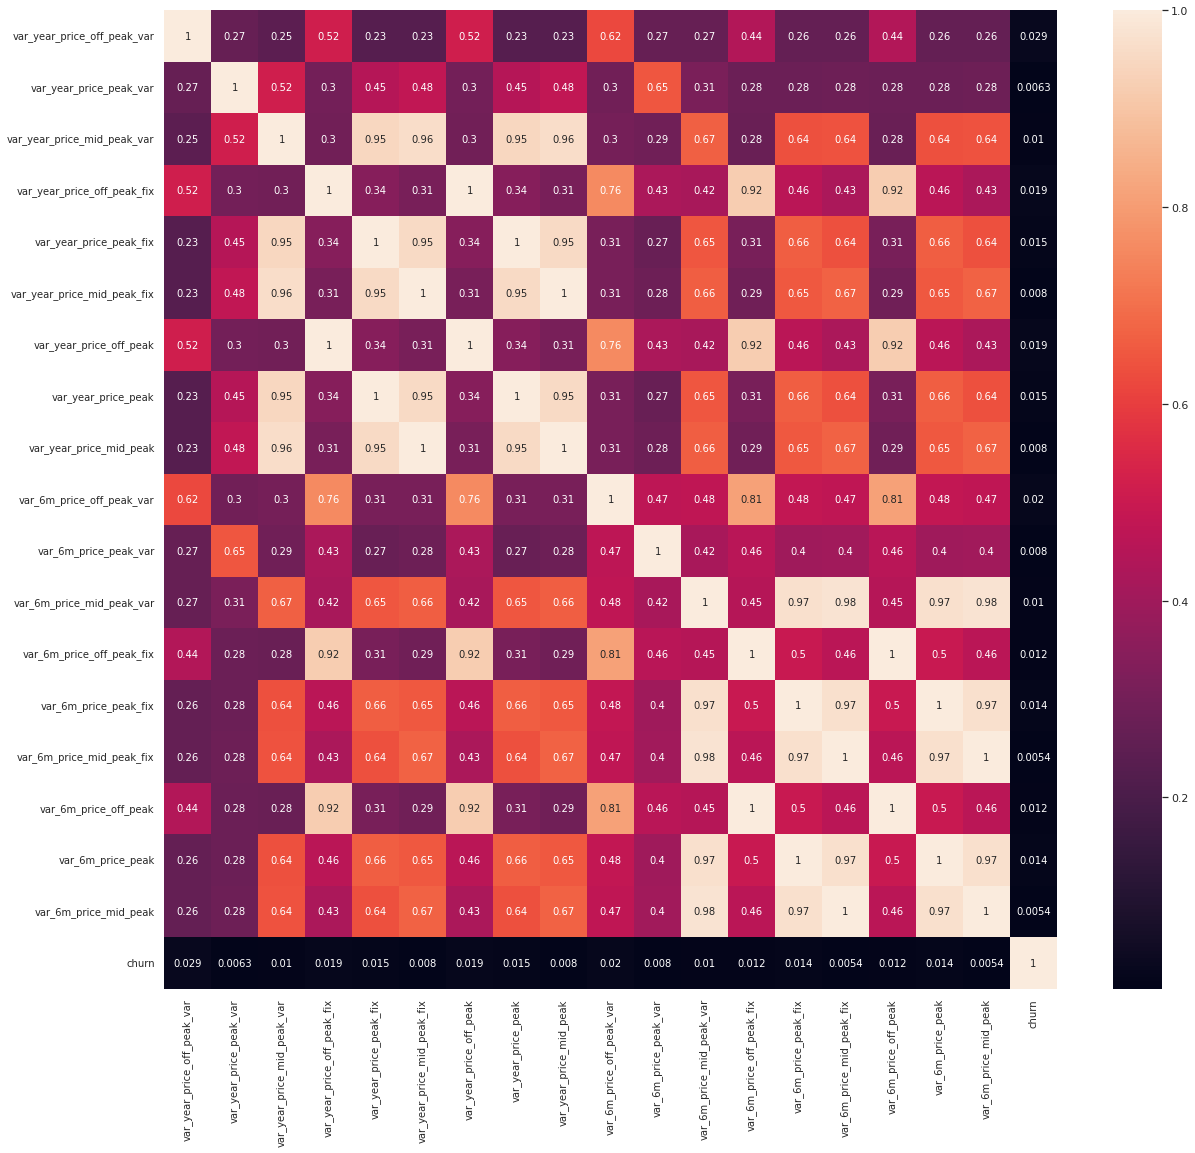

In [35]:
corr=price_analysis.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Price sensitivity features seems to be inter corelated but not with churn. For price sensitivity to be corelated to churn, feature engineering seems necessary.

In [36]:
clean_df=pd.merge(client_df.drop(columns=["churn"]),price_analysis, on="id")
clean_df.head()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [37]:
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


**FEATURE ENGINEERING**

Here 4 things to be looked at- Difference between off-peak prices in December and preceeding january, Average price changes across periods, Maxm price changes across periods and months and Tenure

1) Differnce between off-peak prices in December and preceeding January

In [38]:
#Group off-peak prices by comapnies and month
monthly_price_by_id= price_df.groupby(["id","price_date"]).agg({"price_off_peak_var":'mean','price_off_peak_fix':'mean'}).reset_index()


In [39]:
# to get jan and dec prices
jan_price=monthly_price_by_id.groupby('id').first().reset_index()
dec_price=monthly_price_by_id.groupby('id').last().reset_index()

In [40]:
#calculating the difference
diff= pd.merge(dec_price.rename(columns={'price_off_peak_var':'dec_1','price_off_peak_fix':'dec_2'}),jan_price.drop(columns='price_date'),on='id')
diff['offpeak_diff_dec_jan_energy']=diff['dec_1']-diff['price_off_peak_var']
diff['offpeak_diff_dec_jan_power']=diff['dec_2']-diff['price_off_peak_fix']
diff=diff[['id','offpeak_diff_dec_jan_energy','offpeak_diff_dec_jan_power']]
diff.head()

,id,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [41]:
clean_df=pd.merge(clean_df,diff,on='id')
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


2) Average price changes across individual periods, instead of entire year

In [42]:
mean_prices= price_df.groupby(["id"]).agg({
    'price_off_peak_var':'mean',
    'price_peak_var':'mean',
    'price_mid_peak_var':'mean',
    'price_off_peak_fix':'mean',
    'price_peak_fix':'mean',
    'price_mid_peak_fix':'mean'
}).reset_index()

In [43]:
mean_prices['off_peak_peak_var_mean_diff']= mean_prices['price_off_peak_var']-mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff']= mean_prices['price_peak_var']-mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff']= mean_prices['price_off_peak_var']-mean_prices['price_mid_peak_var']

mean_prices['off_peak_peak_fix_mean_diff']= mean_prices['price_off_peak_fix']-mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff']= mean_prices['price_peak_fix']-mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff']= mean_prices['price_off_peak_fix']-mean_prices['price_mid_peak_fix']

In [44]:
columns=['id','off_peak_peak_var_mean_diff','peak_mid_peak_var_mean_diff','off_peak_mid_peak_var_mean_diff','off_peak_peak_fix_mean_diff',
        'peak_mid_peak_fix_mean_diff','off_peak_mid_peak_fix_mean_diff']
clean_df=pd.merge(clean_df,mean_prices[columns],on='id')
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_jan_energy,offpeak_diff_dec_jan_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


3) Max price changes across periods and months

In [45]:
mean_prices_by_month= price_df.groupby(["id","price_date"]).agg({
    'price_off_peak_var':'mean',
    'price_peak_var':'mean',
    'price_mid_peak_var':'mean',
    'price_off_peak_fix':'mean',
    'price_peak_fix':'mean',
    'price_mid_peak_fix':'mean'
}).reset_index()

In [46]:
mean_prices_by_month['off_peak_peak_var_mean_diff']= mean_prices_by_month['price_off_peak_var']-mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff']= mean_prices_by_month['price_peak_var']-mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff']= mean_prices_by_month['price_off_peak_var']-mean_prices_by_month['price_mid_peak_var']

mean_prices_by_month['off_peak_peak_fix_mean_diff']= mean_prices_by_month['price_off_peak_fix']-mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff']= mean_prices_by_month['price_peak_fix']-mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff']=mean_prices_by_month['price_off_peak_fix']-mean_prices_by_month['price_mid_peak_fix']

In [47]:
max_diff_across_periods_months= mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff':'max',
    'peak_mid_peak_var_mean_diff':'max',
    'off_peak_mid_peak_var_mean_diff':'max',
    'off_peak_peak_fix_mean_diff':'max',
    'peak_mid_peak_fix_mean_diff':'max',
    'off_peak_mid_peak_fix_mean_diff':'max'
}).reset_index().rename(
columns={
    'off_peak_peak_var_mean_diff':'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_mean_diff':'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_mean_diff':'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_mean_diff':'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_mean_diff':'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_mean_diff':'off_peak_mid_peak_fix_max_monthly_diff'
})

In [48]:
columns=[
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

clean_df=pd.merge(clean_df, max_diff_across_periods_months[columns],on='id')
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.26693
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.44471
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.44471
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.44471
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.43733


4) Tenure of association with PowerCo

In [49]:
clean_df['tenure']=((clean_df['date_end']-clean_df['date_activ'])/np.timedelta64(1,'Y')).astype(int)
clean_df.groupby(['tenure']).agg({'churn':'mean'}).sort_values(by='churn',ascending=False)

,churn
tenure,
3,0.143713
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


Companies who are associated with powerco for less than 5 years are more likely to churn.

**DATA TRANSFORMATION**

This is done in 4 steps- transforming the dates into months, transforming boolean data to binary, transforming categorical data and transforming numerical data  

In [50]:
# Transforming the dates into months

def convert_months(refer_date,clean_df,column):
    time_delta=refer_date-clean_df[column]
    months=(time_delta/np.timedelta64(1,'M')).astype(int)
    return months

refer_date= datetime(2016,1,1)

clean_df['months_activ']=convert_months(refer_date, clean_df,'date_activ')
clean_df['months_end']=convert_months(refer_date, clean_df,'date_end')
clean_df['months_modif_prod']=convert_months(refer_date, clean_df, 'date_modif_prod')
clean_df['months_renewal']=convert_months(refer_date,clean_df,'date_renewal')

remove=['date_activ','date_end','date_modif_prod','date_renewal']

clean_df=clean_df.drop(columns=remove)
clean_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.00,0,0.0,1.78,0.114481,...,0.085483,0.146033,44.266930,8.145775,44.26693,3,30,-5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.085483,0.151367,44.444710,0.000000,44.44471,7,76,-7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.089162,0.172468,44.444710,0.000000,44.44471,6,68,-3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.153133,44.444710,0.000000,44.44471,6,69,-2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0.033743,0.055866,16.291555,8.145775,24.43733,6,71,-2,71,9


In [51]:
# transforming boolean data
clean_df['has_gas']=clean_df['has_gas'].replace(['t','f'],[1,0])
clean_df.groupby(['has_gas']).agg({'churn':'mean'})

,churn
has_gas,
0,0.100544
1,0.081856


In [52]:
# transforming categorical features- Channel_sales & origin_up

clean_df["channel_sales"]=clean_df["channel_sales"].astype('category')
clean_df["origin_up"]=clean_df["origin_up"].astype('category')

In [53]:
#categories  within channel sales & origin_up
clean_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [54]:
clean_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Though 8 dummy variables need to be created, last 3 can be dropped comparing the size in both the features

In [55]:
clean_df=pd.get_dummies(clean_df, columns=['channel_sales'], prefix='channel')

clean_df=clean_df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds','channel_epumfxlbckeskwekxbiuasklxalciiuu','channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
clean_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,tenure,months_activ,months_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,3,30,-5,2,6,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,7,76,-7,76,4,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,6,68,-3,68,8,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,6,69,-2,69,9,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,6,71,-2,71,9,1,0,0,0,0


In [56]:
clean_df=pd.get_dummies(clean_df, columns=['origin_up'], prefix='origin')

clean_df=clean_df.drop(columns=['origin_usapbepcfoloekilkwsdiboslwaxobdp','origin_ewxeelcelemmiwuafmddpobolfuxioce','origin_MISSING'])
clean_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [57]:
# transforming numerical data which are skewed
skewed=['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy',
        'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']

clean_df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [58]:
# apply log10 transformation
# log cannot be applied on 0 hence adding constant 1
clean_df['cons_12m']=np.log10(clean_df['cons_12m']+1)
clean_df['cons_gas_12m']=np.log10(clean_df['cons_gas_12m']+1)
clean_df['cons_last_month']=np.log10(clean_df['cons_last_month']+1)
clean_df['forecast_cons_12m']=np.log10(clean_df['forecast_cons_12m']+1)
clean_df['forecast_cons_year']=np.log10(clean_df['forecast_cons_year']+1)
clean_df['forecast_discount_energy']=np.log10(clean_df['forecast_discount_energy']+1)
clean_df['forecast_meter_rent_12m']=np.log10(clean_df['forecast_meter_rent_12m']+1)
clean_df['forecast_price_energy_off_peak']=np.log10(clean_df['forecast_price_energy_off_peak']+1)
clean_df['forecast_price_energy_peak']=np.log10(clean_df['forecast_price_energy_peak']+1)
clean_df['forecast_price_pow_off_peak']=np.log10(clean_df['forecast_price_pow_off_peak']+1)

clean_df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.050918,1.517203,0.055766,0.020918,1.636058
std,0.884515,1.717071,1.769305,0.683592,1.584986,0.267388,0.571481,0.009438,0.020296,0.134237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.047796,0.000000,1.619163
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.058109,0.035085,1.656207
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.059316,0.040933,1.656207
max,6.792889,6.618528,5.887169,4.918575,5.243970,1.491362,2.778376,0.105157,0.077722,1.780075


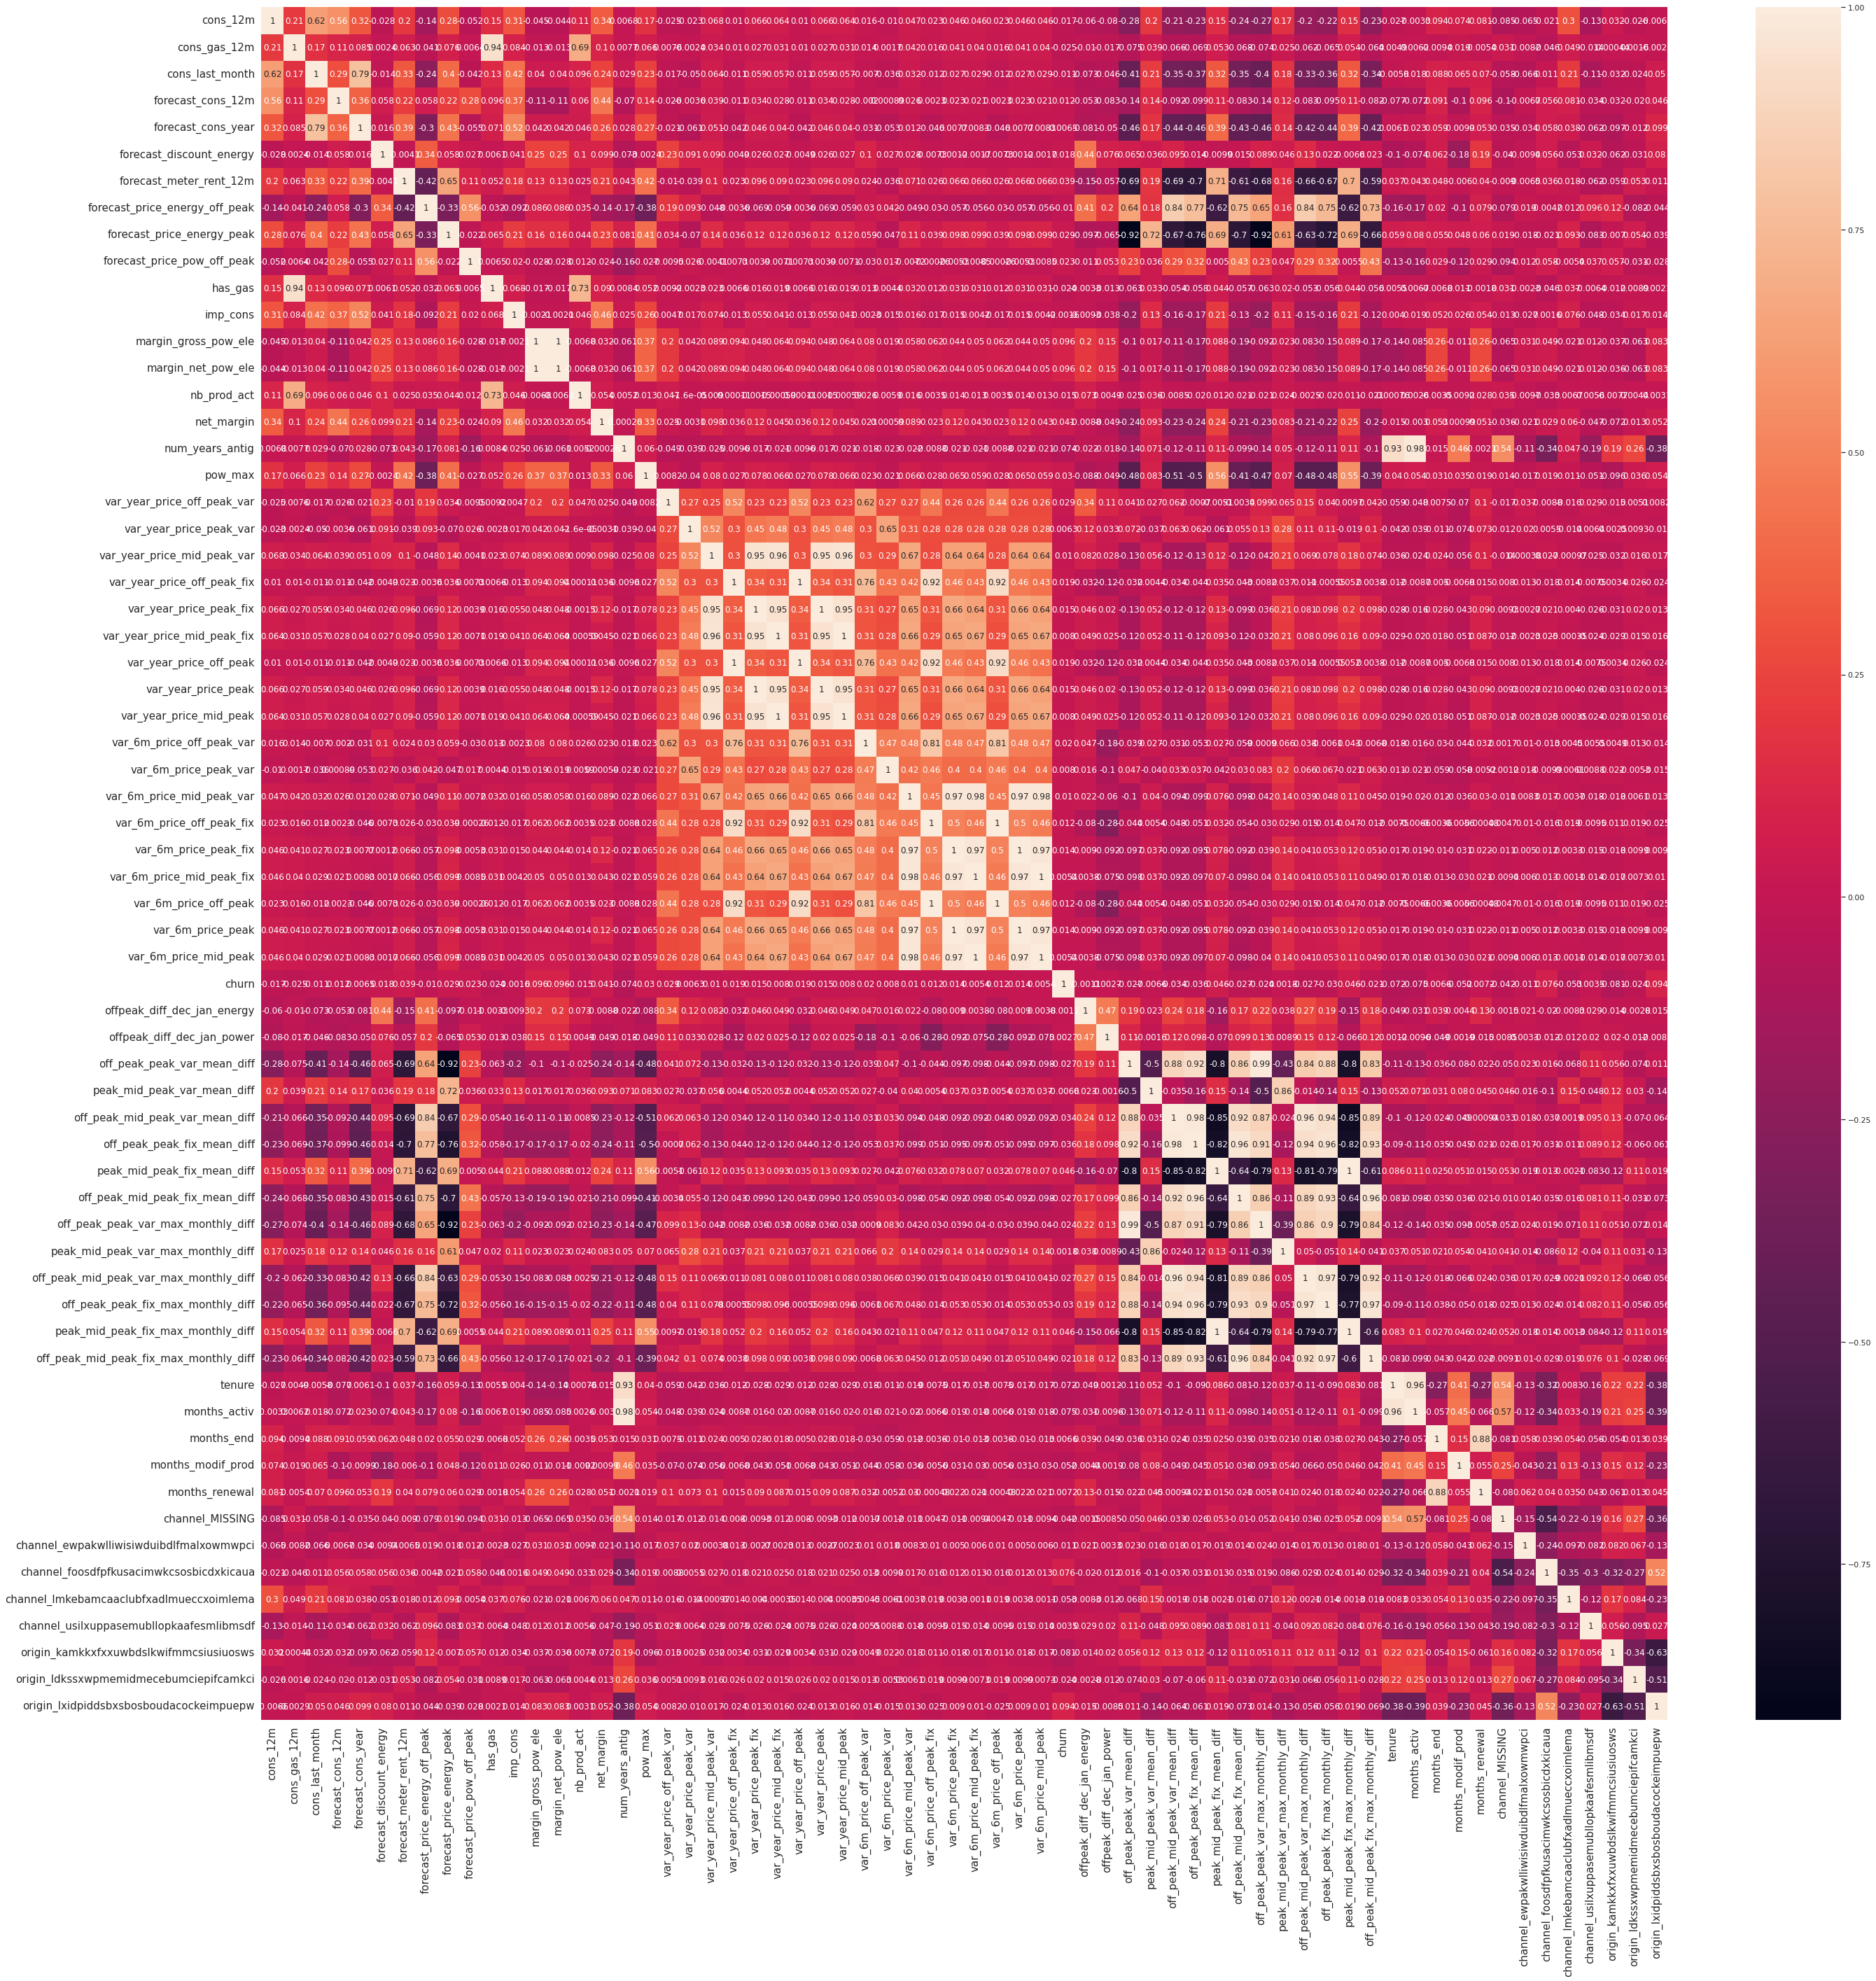

In [59]:
#corelation
correlation=clean_df.corr()

plt.figure(figsize=(45,45))
sns.heatmap(correlation, xticklabels=correlation.columns.values,yticklabels=correlation.columns.values,annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [60]:
clean_df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_price_off_peak',
       'var_6m_price_peak', 'var_6m_price_mid_peak', 'churn',
       'offpeak_diff

In [61]:
clean_df=clean_df.drop(columns=["margin_net_pow_ele", "num_years_antig","months_activ"])

In [62]:
clean_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.047073,0.040659,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.059075,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.066622,0.036589,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.059448,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.048014,0.041399,...,71,9,1,0,0,0,0,1,0,0


**DATA MODELLING**

I have used Random Forest CLassifier since it was focussed in this internship.

In [63]:
#import libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Data Smapling
train_df=clean_df.copy()

In [65]:
y= clean_df['churn']
x=clean_df.drop(columns=['id','churn'])
print(x.shape)
print(y.shape)

(14606, 60)
(14606,)


In [66]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10954, 60)
(3652, 60)
(10954,)
(3652,)


In [67]:
# model training
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [68]:
#evaluation
predictions=model.predict(x_test)
tn,fp,fn,tp=metrics.confusion_matrix(y_test,predictions).ravel()

In [69]:
y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

In [70]:
print(f"True positives:{tp}")
print(f"False positives:{fp}")
print(f"True negatives:{tn}")
print(f"False negatives:{fn}")

True positives:16
False positives:3
True negatives:3283
False negatives:350


In [71]:
print(f"Accuracy:{metrics.accuracy_score(y_test,predictions)}")
print(f"Precision:{metrics.precision_score(y_test,predictions)}")
print(f"Recall:{metrics.recall_score(y_test,predictions)}")

Accuracy:0.9033406352683461
Precision:0.8421052631578947
Recall:0.04371584699453552


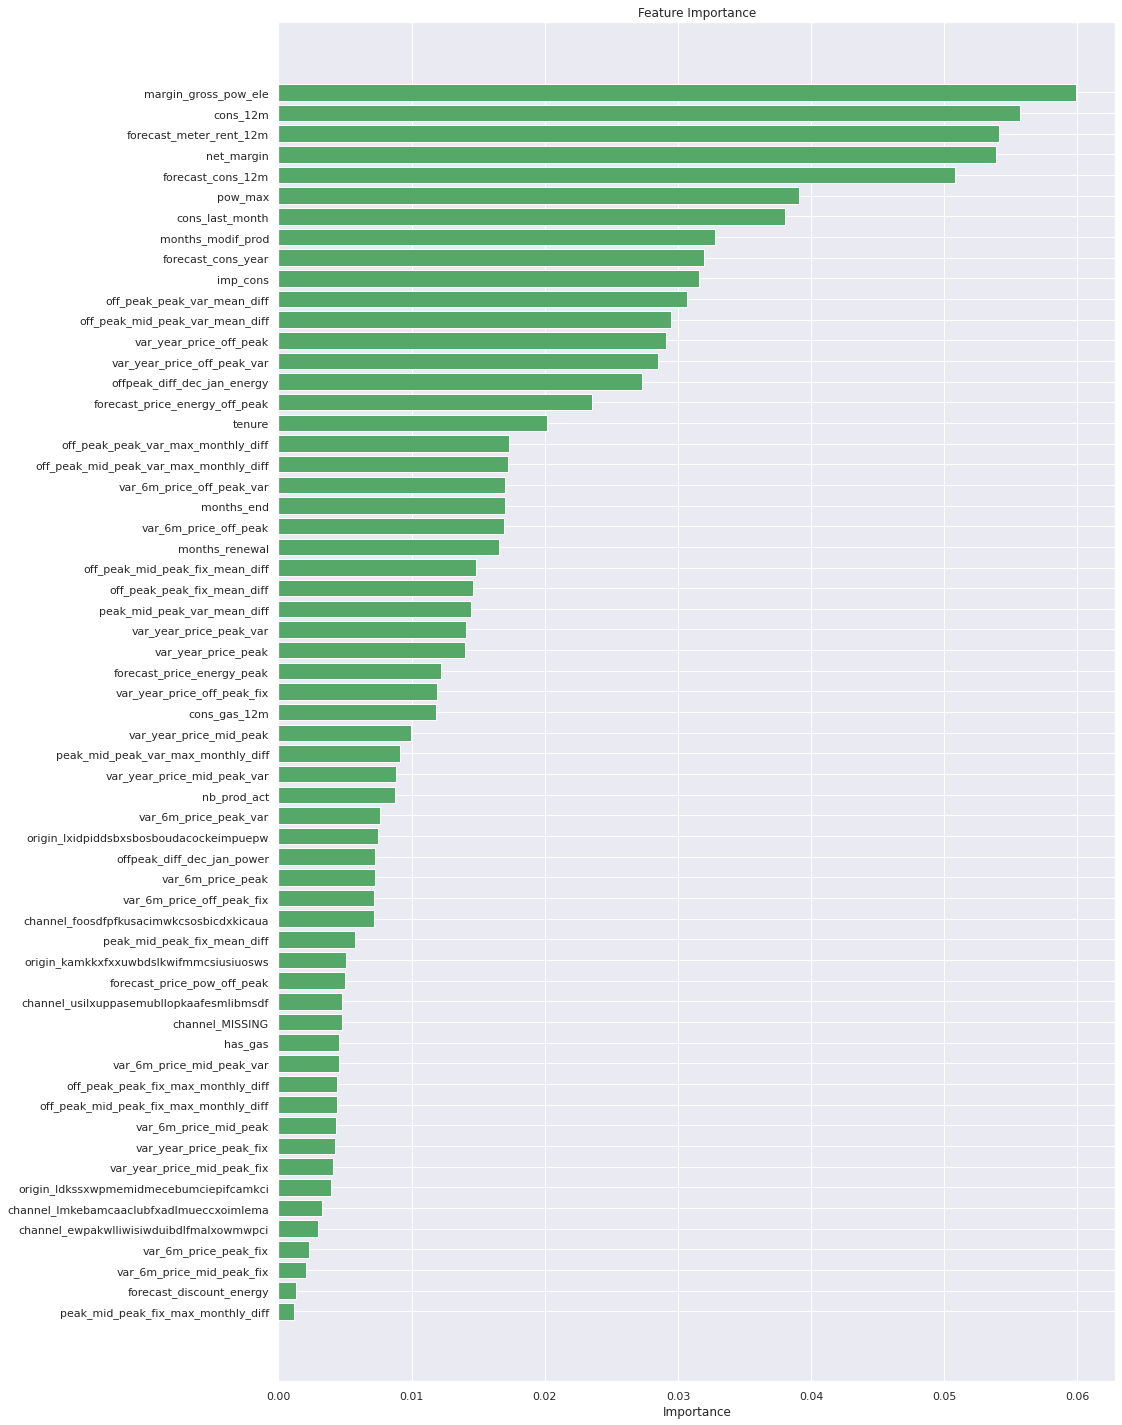

In [72]:
# model understanding
feature_importances=pd.DataFrame({'features':x_train.columns, 'importance':model.feature_importances_}).sort_values(by='importance',ascending=True).reset_index()

plt.figure(figsize=(15,25))
plt.title("Feature Importance")
plt.barh(range(len(feature_importances)),feature_importances['importance'],color='g',align='center')
plt.yticks(range(len(feature_importances)),feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Here on,I have executed codes given in the solution of internship

In [73]:
proba_predictions=model.predict_proba(x_test)
probabilities=proba_predictions[:,1]

In [74]:
x_test=x_test.reset_index()
x_test.drop(columns='index',inplace=True)

In [75]:
x_test['churn']=predictions.tolist()

In [76]:
x_test['churn_probability']=probabilities.tolist()

In [77]:
x_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.173390,4.193598,3.165541,3.168368,3.165541,0.000000,2.073828,0.047145,0.041214,1.619163,...,0,0,1,0,0,0,0,1,0,0.155
1,4.075036,0.000000,3.003461,3.305998,3.003461,1.491362,1.255031,0.078492,0.000000,1.674911,...,0,0,1,0,0,0,0,1,0,0.143
2,3.848435,0.000000,0.000000,2.756568,0.000000,0.000000,1.289366,0.057451,0.000000,1.656207,...,0,0,1,0,0,0,0,1,0,0.039
3,4.345433,0.000000,0.000000,3.516690,0.000000,0.000000,1.304921,0.058045,0.000000,1.656207,...,0,0,1,0,0,0,0,1,0,0.140
4,4.185655,0.000000,3.355834,3.208148,3.355834,0.000000,2.123067,0.049362,0.042767,1.619163,...,0,0,1,0,0,0,1,0,0,0.065


In [78]:
#calculating baseline revenue estimate
x_test["basecase_revenue"]=(np.power(10,x_test["forecast_cons_12m"])+1)*x_test["forecast_price_energy_off_peak"]+x_test['forecast_meter_rent_12m']
x_test['basecase_revenue_after_churn']=x_test['basecase_revenue']*(1-0.919*x_test['churn'])
x_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,4.173390,4.193598,3.165541,3.168368,3.165541,0.000000,2.073828,0.047145,0.041214,1.619163,...,1,0,0,0,0,1,0,0.155,71.592172,71.592172
1,4.075036,0.000000,3.003461,3.305998,3.003461,1.491362,1.255031,0.078492,0.000000,1.674911,...,1,0,0,0,0,1,0,0.143,160.122851,160.122851
2,3.848435,0.000000,0.000000,2.756568,0.000000,0.000000,1.289366,0.057451,0.000000,1.656207,...,1,0,0,0,0,1,0,0.039,34.146056,34.146056
3,4.345433,0.000000,0.000000,3.516690,0.000000,0.000000,1.304921,0.058045,0.000000,1.656207,...,1,0,0,0,0,1,0,0.140,192.107752,192.107752
4,4.185655,0.000000,3.355834,3.208148,3.355834,0.000000,2.123067,0.049362,0.042767,1.619163,...,1,0,0,0,1,0,0,0.065,81.888015,81.888015


In [79]:
# calculating the estimated benefits & costs of intervention
def get_rev_delta(pred:pd.DataFrame,cutoff:float=0.5,discount:float=0.2):
    pred['discount_revenue']=pred['basecase_revenue_after_churn']
    pred.loc[pred['churn_probability']>=cutoff,'discount_revenue']=pred['basecase_revenue']*(1-discount)
    pred['revenue_delta']=pred['discount_revenue']-pred['basecase_revenue_after_churn']
    return pred["revenue_delta"].sum()

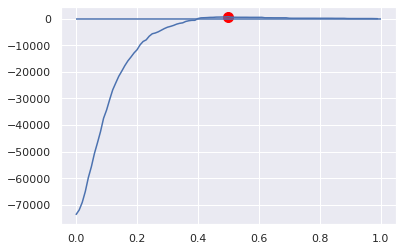

Maximum benefit at cutoff 0.5 with revenue delta of $730.19


In [80]:
rev_deltas=pd.Series({cutoff:get_rev_delta(x_test,cutoff=cutoff) for cutoff in np.arange(0,1,0.01)})
def plot_tradeoff(rev_deltas: pd.Series):
    rev_deltas.plot()
    max_pred=rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred],s=100,c='red')
    plt.hlines(0,0,1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')
plot_tradeoff(rev_deltas)

This is a very good virtual internship program. Must try!!

You get various techniques of writing code in simple ways, i have also implemented the same here.